In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')
sns.set_palette('husl')

In [ ]:
!{sys.executable} -m pip install py-heat-magic
%load_ext heat
!{sys.executable} -m pip install memory_profiler
%load_ext memory_profiler

In [ ]:
def factorial(n):
  product = 1
  for i in range(n):
    product = product * (i+1)
  return product

In [ ]:
print(factorial(5))

In [ ]:
def factorial_r(n):
  if n == 0: 
    return 1 
  else: 
    return n * factorial_r(n-1)

print(factorial_r(5))

In [ ]:
%timeit factorial(50)

In [ ]:
%timeit factorial_r(50)

El tiempo de ejecución muestra que el primer algoritmo es más rápido en comparación con el segundo, que implica la recursión. Cuando se trata de entradas grandes, la diferencia de rendimiento puede ser más significativa.

Sin embargo, el tiempo de ejecución no es una buena métrica para medir la complejidad de un algoritmo, ya que depende del hardware. Se necesita una métrica de análisis de complejidad más objetiva para un algoritmo. Aquí es donde entra en juego la notación Big O.


### Complejidad Constante

In [ ]:
def constant_algorithm(n):
  result = n[0] * n[0]
  print(result)

constant_algorithm([4,5,6,8])


Se dice que la complejidad de un algoritmo es constante si los pasos necesarios para completar la ejecución de un algoritmo permanecen constantes, independientemente del número de entradas. La complejidad constante se denota por O(c), donde c puede ser cualquier número constante.

In [ ]:
steps = []
def constant(n):
    return 1
    
for i in range(1, 100):
    steps.append(constant(i))
plt.plot(steps)

#### Complejidad Linear

Se dice que la complejidad de un algoritmo es lineal si los pasos necesarios para completar la ejecución de un algoritmo aumentan o disminuyen linealmente con el número de entradas. La complejidad lineal se denomina O(n).

In [ ]:
def linear_algo(items):
    for item in items:
        print(item)

linear_algo([4, 5, 6, 8])

In [ ]:
steps = []
def linear(n):
    return n
    
for i in range(1, 100):
    steps.append(linear(i))
    
plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

In [ ]:
def linear_algo(items):
    for item in items:
        print(item)

    for item in items:
        print(item)

linear_algo([4, 5, 6, 8])

In [ ]:
steps = []
def linear(n):
    return 2*n
    
for i in range(1, 100):
    steps.append(linear(i))
    
plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

### Complejidad Cuadratica

Se dice que la complejidad de un algoritmo es cuadrática cuando los pasos necesarios para ejecutarlo son una función cuadrática del número de elementos de la entrada. La complejidad cuadrática se denomina O(n²):

In [ ]:
def quadratic_algorithm(items):
    for item in items:
        for item2 in items:
            print(item, ' ' ,item2)

quadratic_algorithm([4, 5, 6, 8])

In [ ]:
steps = []
def cuadratic(n):
    return n*n
    
for i in range(1, 100):
    steps.append(cuadratic(i))
    
plt.plot(steps)
plt.xlabel('Inputs')
plt.ylabel('Steps')

In [ ]:
def cubic_algorithm(items):
    for item in items:
        for item2 in items:
            print(item, ' ' ,item2)
            for item3 in items:
              print(item, ' ', item3)

cubic_algorithm([4, 5, 6, 8])

In [ ]:
from math import log
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

n = np.linspace(1,15)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

plt.figure(figsize=(12,10))
plt.ylim(0,100)

for i in range(len(big_o)):
  sns.lineplot(n,big_o[i],label = labels[i])

### Diseño de algoritmos

### Algoritmos de Fuerza Bruta

Los algoritmos de fuerza bruta son conocidos por su amplia aplicabilidad y simplicidad en la resolución de problemas complejos. La búsqueda, la coincidencia de cadenas y la multiplicación de matrices son algunos de los escenarios en los que se utilizan. Los algoritmos de fuerza bruta permiten resolver tareas computacionales individuales. No proporcionan algoritmos eficientes. Los algoritmos son lentos y poco eficaces.

In [ ]:
# Selection sort in Python
# time complexity O(n*n)
#sorting by finding min_index
def selectionSort(array, size):
    
    for ind in range(size):
        min_index = ind
 
        for j in range(ind + 1, size):
            # select the minimum element in every iteration
            if array[j] < array[min_index]:
                min_index = j
         # swapping the elements to sort the array
        (array[ind], array[min_index]) = (array[min_index], array[ind])
 
arr = [29,72,98,13,87,66,52,51,36]
size = len(arr)
selectionSort(arr, size)
print('The array after sorting in Ascending Order by selection sort is:')
print(arr)

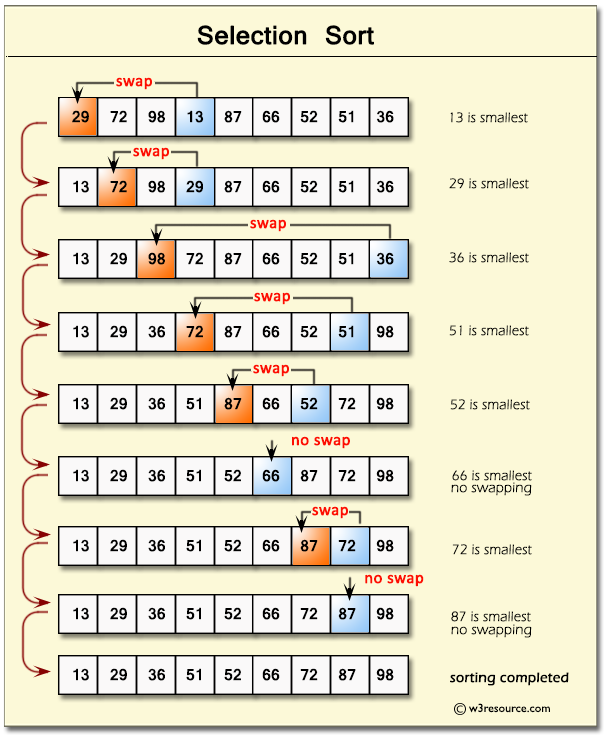

#### Algoritmos divide y venceras
Un algoritmo de "divide y vencerás" divide un problema complejo en problemas más pequeños y los resuelve. El problema más pequeño se seguirá dividiendo hasta que sea un problema conocido. El enfoque consiste en resolver recursivamente los subproblemas y fusionar las soluciones de los subproblemas.

La recursión, quicksort, binary search, y la transformada rápida de Fourier son buenos ejemplos de algoritmos de divide y vencerás. La memoria se utiliza de forma eficiente con estos algoritmos. 

In [ ]:
def mergeSort(arr): 
  if len(arr) >1: 
      mid = len(arr)//2 
      L = arr[:mid]  
      R = arr[mid:] 

      mergeSort(L)  
      mergeSort(R) 

      i = j = k = 0
      while i < len(L) and j < len(R): 
          if L[i] < R[j]: 
              arr[k] = L[i] 
              i+= 1
          else: 
              arr[k] = R[j] 
              j+= 1
          k+= 1

      while i < len(L): 
          arr[k] = L[i] 
          i+= 1
          k+= 1
        
      while j < len(R): 
          arr[k] = R[j] 
          j+= 1
          k+= 1
  return arr

In [ ]:
### MiniTutorial de Slicers
''' 
a[start:stop]  # items start through stop-1
a[start:]      # items start through the rest of the array
a[:stop]       # items from the beginning through stop-1
a[:]           # a copy of the whole array

a[start:stop:step] # start through not past stop, by step
a[-1]    # last item in the array
a[-2:]   # last two items in the array
a[:-2]   # everything except the last two items

a[::-1]    # all items in the array, reversed
a[1::-1]   # the first two items, reversed
a[:-3:-1]  # the last two items, reversed
a[-3::-1]  # everything except the last two items, reversed
''' 

NameError: ignored

In [ ]:
arr = [2,4,5,6,7]
mid = len(arr)//2 
arr[:2] 

[2, 4]

### Recursividad

In [ ]:
def add_up_to(n):
  total = 0
  i=1
  while i <= n:
    total = total+i
    i = i+1
  return total

In [ ]:
add_up_to(100)

5050

In [ ]:
def add_up_to_r(n):
  return n*(n+1)/2

In [ ]:
add_up_to_r(100)

5050.0

Pausa: Sobre la serie aritmetica para sumar los numeros del 1 al 100 y la anecdota de gauss. 
https://francis.naukas.com/2010/04/15/iii-carnaval-de-matematicas-toda-la-verdad-sobre-la-anecdota-de-gauss-el-nino-prodigio-su-profesor-y-la-suma-de-1-a-100/

#### Algoritmos Backtracking
Un algoritmo de backtracking resuelve un problema construyendo la solución de forma incremental. Se evalúan múltiples opciones, y el algoritmo elige ir al siguiente componente de la solución a través de la recursión. El backtracking puede ser de tipo cronológico o puede recorrer los caminos, dependiendo del problema que esté resolviendo.

In [ ]:
''' 
def backtracking_algorithm(x)
    if x is not a solution
        return False
    if x is a new solution
        add to list of solutions
    backtrack(expand x)
'''


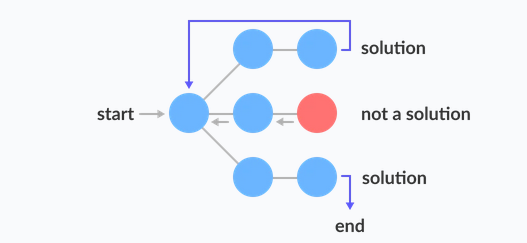

#### Complejidad de Memoria

**CPU Times:** el tiempo que realmente pasa la CPU ejecutando el código del método. 

**Wall Times:** el tiempo real transcurrido entre un par de eventos, por ejemplo, entre la entrada y la salida del método.

In [ ]:
%time sqrts = [n ** (1/2) for n in range(100)]

In [ ]:
for i in range(5): 
    %time sqrts = [n ** (1/2) for n in range(10**i)]

In [ ]:
%%time
for i in range(5): 
    sqrts = [n ** (1/2) for n in range(10**i)]

IPython lo ejecutará 100000 veces y dividirá el tiempo total para obtener una medida más precisa, luego este proceso se repite 7 veces para calcular el tiempo medio y la varianza

In [ ]:
%%timeit
for i in range(5): 
    sqrts = [n ** (1/2) for n in range(10**i)]

In [ ]:
def bubble_sort(array):
    n = len(array)

    for i in range(n):
        # Crear una bandera que permita a la función
        # termine antes de tiempo si no queda nada que ordenar
        already_sorted = True

        # Comienza a evaluar cada elemento de la lista uno por uno,
        # comparándolo con su valor adyacente. 
        # Con cada iteración, la porción del array que se mira
        # se reduce porque los elementos restantes ya han sido ordenados.
        
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                # Si el elemento que estás mirando es mayor que su
                # valor adyacente, entonces intercámbialos
                array[j], array[j + 1] = array[j + 1], array[j]
                # al intercambiar dos elementos, se establece la bandera `already_sorted` en `False`
                already_sorted = False
        if already_sorted:
            break

    return array

In [ ]:
%%time
print(bubble_sort([8, 2, 6, 4, 5]))

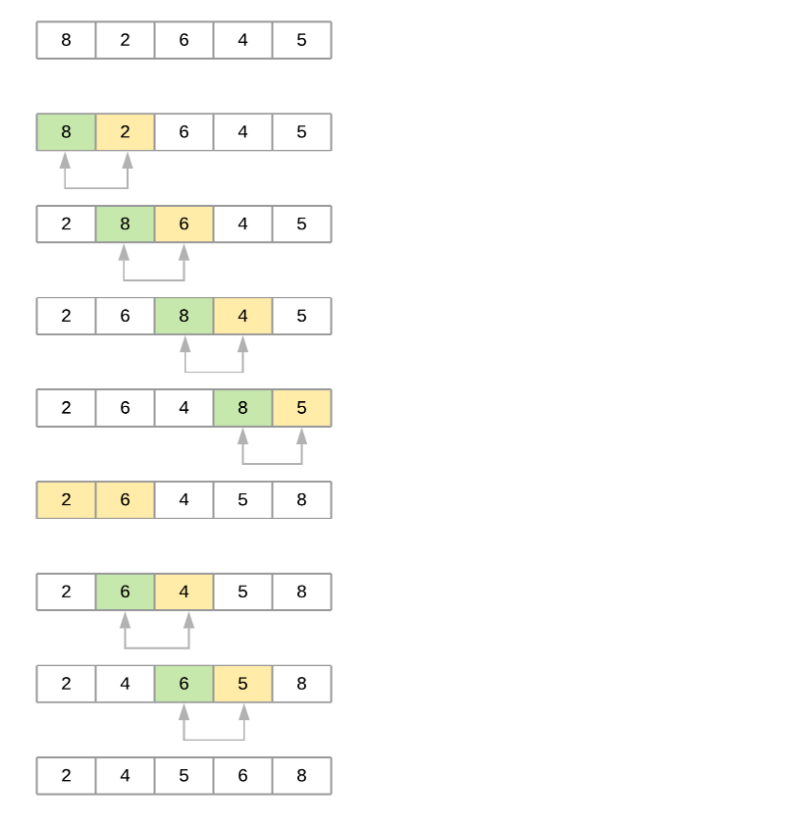
<div>
<img src="attachment:asss.jpg" width="500"/>
</div>

In [ ]:
%prun print(bubble_sort([8, 2, 6, 4, 5]))

**ncalls:** Número de veces que se llamó a la función

**tottime:** Tiempo total transcurrido en la propia función.

**percall:** Tiempo medio necesario por llamada a la función (tottime/ncalls).

**cumtime:** Tiempo total transcurrido dentro de la función y de las subfunciones llamadas.

In [ ]:
import sys
!{sys.executable} -m pip install line_profiler

In [ ]:
import sys
!{sys.executable} -m pip line line_profiler
%load_ext line_profiler


In [ ]:
%lprun -f factorial factorial(5)

Hits: Numero de veces que la línea se ejecuta. 
Time: Tiempo total que implementa cada línea. (la unidad está descrita por Timer unit) 
Per Hit: Tiempo promedio que utiliza la línea. 
%Time: Tiempo total que el algoritmo ocupa en esta línea.

In [ ]:
!{sys.executable} -m pip install py-heat-magic
%load_ext heat


In [ ]:
%%heat
def bubble_sort(array):
    n = len(array)

    for i in range(n):
        already_sorted = True
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break

    return array

bubble_sort([8, 2, 6, 4, 5])


In [ ]:
%%file my_file.py
from random import random

def create_and_sum_matrix(N):
    matrix = [[random() for _ in range(N)] for _ in range(N)]
    total_by_line = [sum(l) for l in matrix]
    total = sum(total_by_line)
    del total_by_line
    del matrix
    return total

def my_buuble_sort(array):
    n = len(array)

    for i in range(n):
        already_sorted = True
        for j in range(n - i - 1):
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
                already_sorted = False
        if already_sorted:
            break

    return array


In [ ]:
from my_file import create_and_sum_matrix
%mprun -f create_and_sum_matrix create_and_sum_matrix(500)

In [ ]:
from my_file import my_buuble_sort
%mprun -f my_buuble_sort my_buuble_sort([8, 2, 6, 4, 5])
